### Data extraction

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load the Excel file
df = pd.read_excel("Hackathon Database.xlsx")

# Remove empty rows (if any)
df = df.dropna(subset=df.columns[1:15], how='all')

   Rolling_Avg_Consumption
1                56.118929
2                57.101607
3                57.723071
4                57.256518
5                57.319871


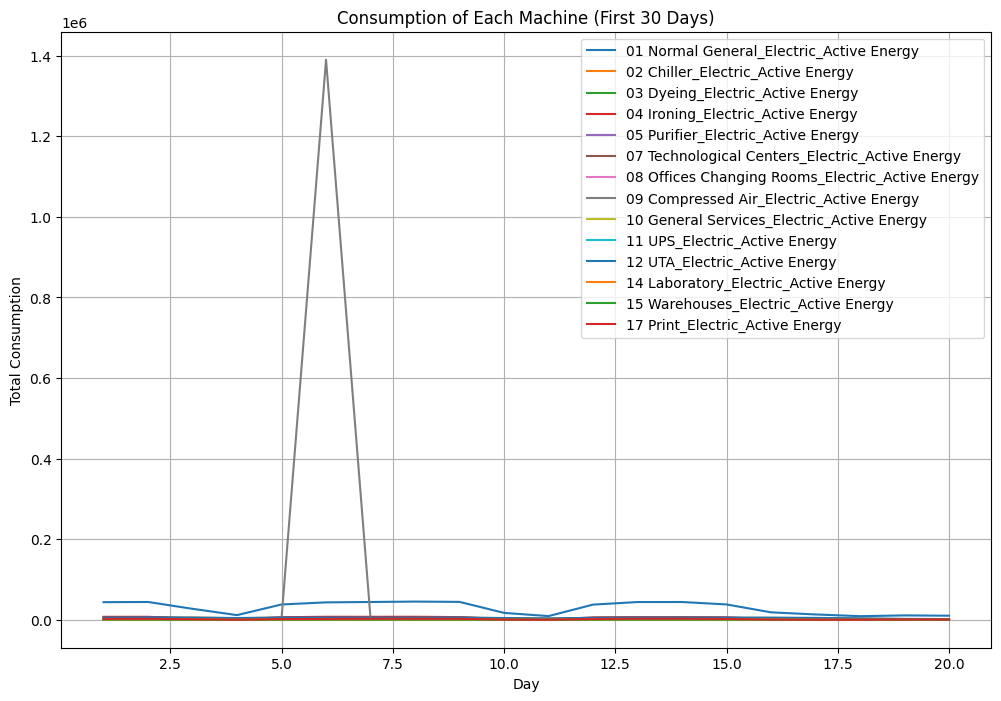

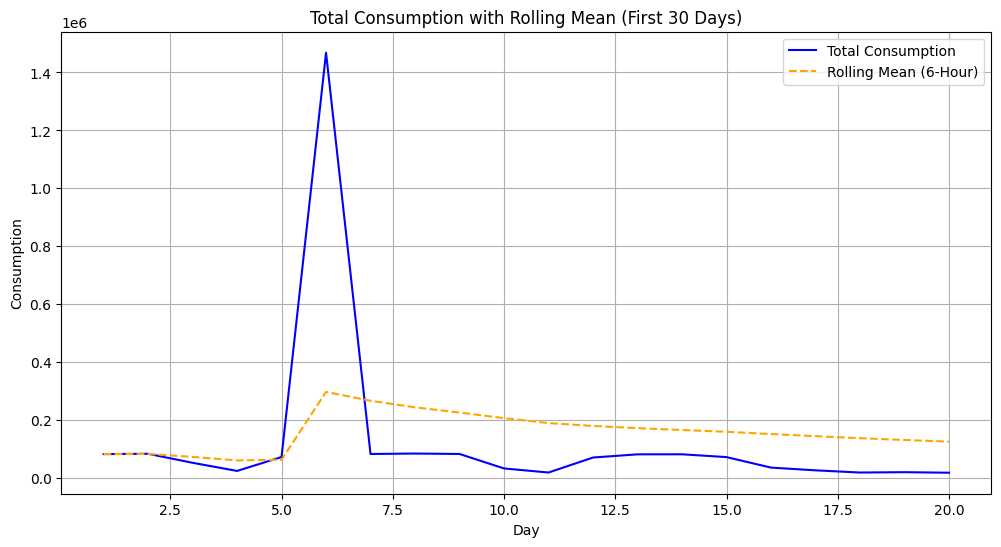

In [24]:
# Define the daily chunk size (excluding the first row which might be headers)
rows_per_day = 96

# Extract the relevant columns
energy_columns = df.loc[:, df.columns[1:15]]  # Columns B to O
power_factor_columns = df.loc[:, df.columns[19:33]]  # Columns T to AG
active_power_columns = df.loc[:, df.columns[36:50]]  # Columns AJ to AW

# Split the dataset into daily chunks and ensure each chunk is a copy
days = [df.iloc[i:i+rows_per_day].copy() for i in range(1, len(df), rows_per_day)] 

# Compute rolling average consumption with a 6-hour window (24 rows, since 15 min per row)
rolling_window = 24
for day in days:
    day['Rolling_Avg_Consumption'] = day.loc[:, df.columns[1:15]].mean(axis=1).rolling(window=rolling_window, min_periods=1).mean()

# Example: Display the first day's data and rolling average
first_day = days[0]
print(first_day[['Rolling_Avg_Consumption']].head())

#--------------------------------------------------------------------------------------------

# Graph the consumption for the first 30 days (for each machine)
plt.figure(figsize=(12, 8))

# Plot each machine's consumption for the first 30 days
for i, col in enumerate(df.columns[1:15]):  # Columns B to O (first 15 columns)
    consumption_data = [day.loc[:, col].sum() for day in days[20:40]]  # Total daily consumption for each machine
    plt.plot(range(1, 21), consumption_data, label=col)  # Plot for each machine

plt.title('Consumption of Each Machine (First 30 Days)')
plt.xlabel('Day')
plt.ylabel('Total Consumption')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Now plot the total consumption with the rolling mean (for the first 30 days)
total_consumption = [sum(day.loc[:, df.columns[1:15]].sum(axis=1)) for day in days[20:40]]  # Sum of all machines per day
rolling_mean = pd.Series(total_consumption).rolling(window=rolling_window, min_periods=1).mean()

# Plot the total consumption and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), total_consumption, label='Total Consumption', color='blue')
plt.plot(range(1, 21), rolling_mean, label='Rolling Mean (6-Hour)', color='orange', linestyle='--')

plt.title('Total Consumption with Rolling Mean (First 30 Days)')
plt.xlabel('Day')
plt.ylabel('Consumption')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()